In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# see all columns
pd.set_option('display.max_columns', None)

# read in df
df = pd.read_excel(r"D:\Data Scraping\Turo\Nashville\clean data\Q4_only.xlsx")
df

# set theme
sns.set_style("dark")

In [2]:
# change column year to object
df['year_jan2024'] = df['year_jan2024'].astype(object)

# filter for only Nashville
df_nash = df[df['city_jan2024'] == 'Nashville']

# top 50 by make/model/year
trips_by_make_model_year = df_nash.groupby(by = ['type_jan2024', 'make_jan2024', 'model_jan2024', 'year_jan2024'])[['trips_Q4_2023', 'average_q4_price']].mean().reset_index().sort_values(by = 'trips_Q4_2023', ascending = False).head(50)

trips_by_make_model_year

,type_jan2024,make_jan2024,model_jan2024,year_jan2024,trips_Q4_2023,average_q4_price
102,CAR,Nissan,Altima,2015,33.000000,36.176429
345,SUV,Volkswagen,Tiguan,2019,29.000000,47.550000
249,SUV,Hyundai,Tucson,2017,28.000000,46.800000
107,CAR,Nissan,Maxima,2014,28.000000,42.000000
209,SUV,Dodge,Journey,2020,27.000000,50.765000
17,CAR,Chevrolet,Camaro,2019,26.000000,56.776905
44,CAR,Ford,Focus,2012,26.000000,32.799000
79,CAR,Kia,Optima,2020,24.000000,48.888333
58,CAR,Honda,Civic,2012,24.000000,36.628500
309,SUV,Nissan,Kicks,2019,24.000000,37.049125


In [3]:
# bottom 50 by make/model/year
bottom_make_model_year = df_nash.groupby(by = ['type_jan2024', 'make_jan2024', 'model_jan2024', 'year_jan2024'])[['trips_Q4_2023', 'average_q4_price']].mean().reset_index().sort_values(by = 'trips_Q4_2023', ascending = False).tail(50)

bottom_make_model_year

,type_jan2024,make_jan2024,model_jan2024,year_jan2024,trips_Q4_2023,average_q4_price
101,CAR,Mercedes-Benz,E-Class,2018,4.0,73.010833
179,SUV,BMW,X3,2013,4.0,72.187500
296,SUV,Mazda,CX-9,2022,4.0,113.812500
16,CAR,Chevrolet,Camaro,2015,4.0,64.086667
261,SUV,Jeep,Grand Cherokee,2019,4.0,73.203750
161,PASSENGER_MINIVAN,Honda,Odyssey,2021,4.0,82.056667
216,SUV,Ford,EcoSport,2019,4.0,45.352500
59,CAR,Honda,Civic,2016,4.0,49.378889
292,SUV,Lincoln,Navigator L,2020,4.0,93.693750
293,SUV,Maserati,Levante,2018,4.0,159.000000


### Type

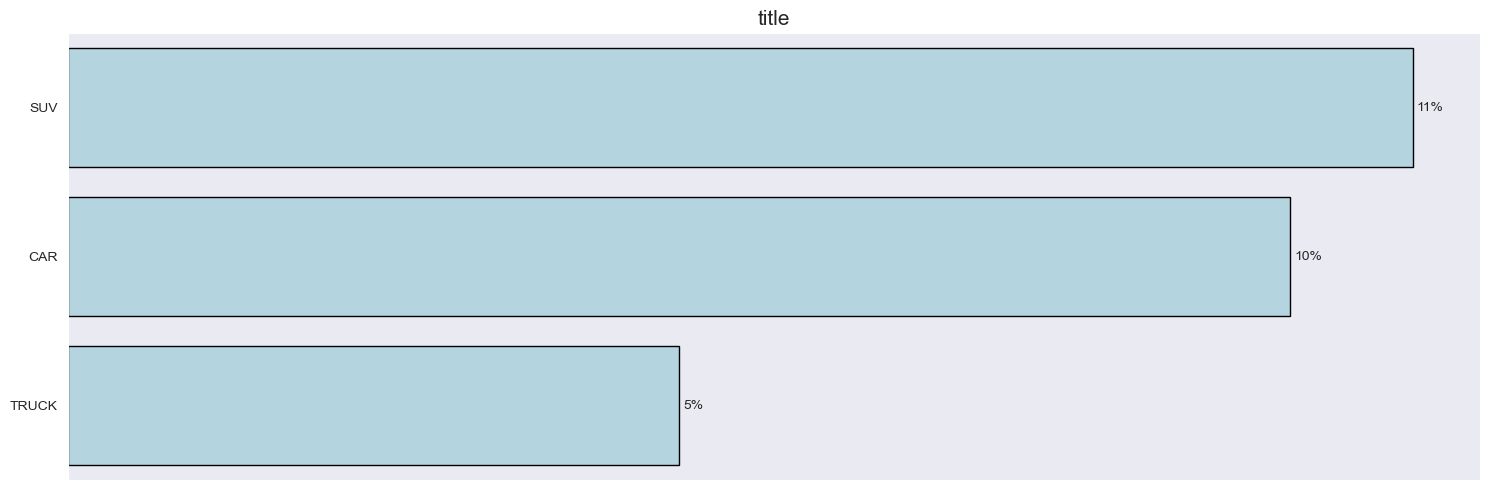

In [4]:
df1 = trips_by_make_model_year.groupby(by = 'type_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]
df2 = df_nash.groupby(by = 'type_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]

df_merge = pd.merge(df1, df2, on = 'type_jan2024', how = 'inner')

df_merge['type_proportion'] = round(df_merge['make_jan2024'] / df_merge['id'], 2) * 100

plt.figure(figsize=(15, 5))

plot = sns.barplot(data = df_merge, y = 'type_jan2024', x = 'type_proportion', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.0f}%', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), 
                textcoords='offset points')
    
plt.title('title', fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks(ticks = range(0, 3), labels = df_merge['type_jan2024'])
plt.tight_layout()

In [5]:
df1 = bottom_make_model_year.groupby(by = 'type_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]
df2 = df_nash.groupby(by = 'type_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]

df_merge = pd.merge(df1, df2, on = 'type_jan2024', how = 'inner')

df_merge['type_proportion'] = round(df_merge['make_jan2024'] / df_merge['id'], 2) * 100

df_merge = df_merge.sort_values(by = 'type_proportion', ascending = False)
df_merge

,type_jan2024,make_jan2024,id,type_proportion
5,VAN,1,2,50.0
2,TRUCK,4,19,21.0
4,PASSENGER_VAN,1,6,17.0
0,SUV,25,237,11.0
1,CAR,17,218,8.0
3,PASSENGER_MINIVAN,2,25,8.0


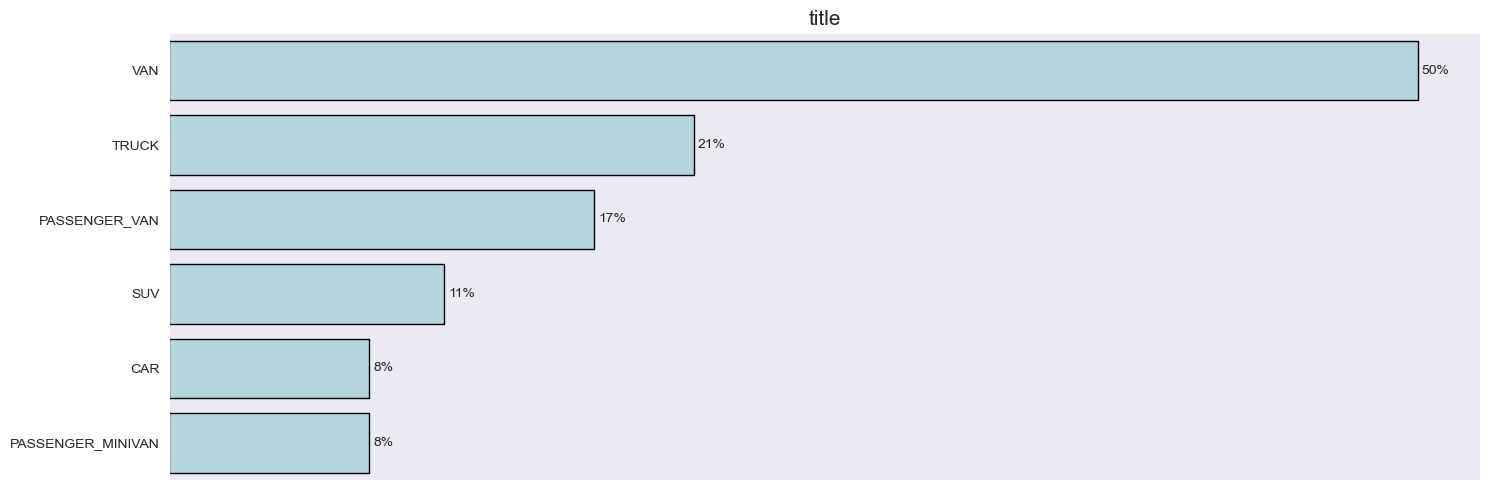

In [6]:
df1 = bottom_make_model_year.groupby(by = 'type_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]
df2 = df_nash.groupby(by = 'type_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]

df_merge = pd.merge(df1, df2, on = 'type_jan2024', how = 'inner')

df_merge['type_proportion'] = round(df_merge['make_jan2024'] / df_merge['id'], 2) * 100

df_merge = df_merge.sort_values(by = 'type_proportion', ascending = False)

plt.figure(figsize=(15, 5))

plot = sns.barplot(data = df_merge, y = 'type_jan2024', x = 'type_proportion', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.0f}%', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), 
                textcoords='offset points')
    
plt.title('title', fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks(ticks = range(0, 6), labels = df_merge['type_jan2024'])
plt.tight_layout()

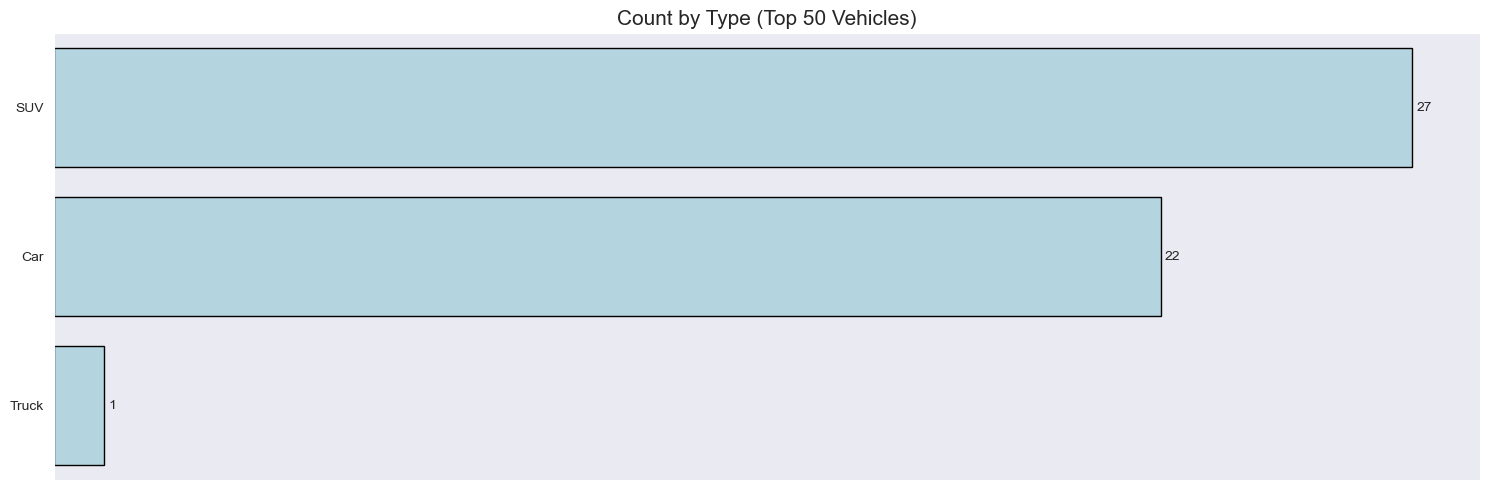

In [7]:
count_type = trips_by_make_model_year.groupby(by = 'type_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False)

plt.figure(figsize=(15, 5))

plot = sns.barplot(data = count_type, y = 'type_jan2024', x = 'make_jan2024', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.0f}', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), 
                textcoords='offset points')
    
plt.title('Count by Type (Top 50 Vehicles)', fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks(ticks = range(0, 3), labels = ['SUV', 'Car', 'Truck'])
plt.tight_layout()


plt.savefig('D:\Data Scraping\Turo\Charts\countbytypetop50.png', dpi = 300)

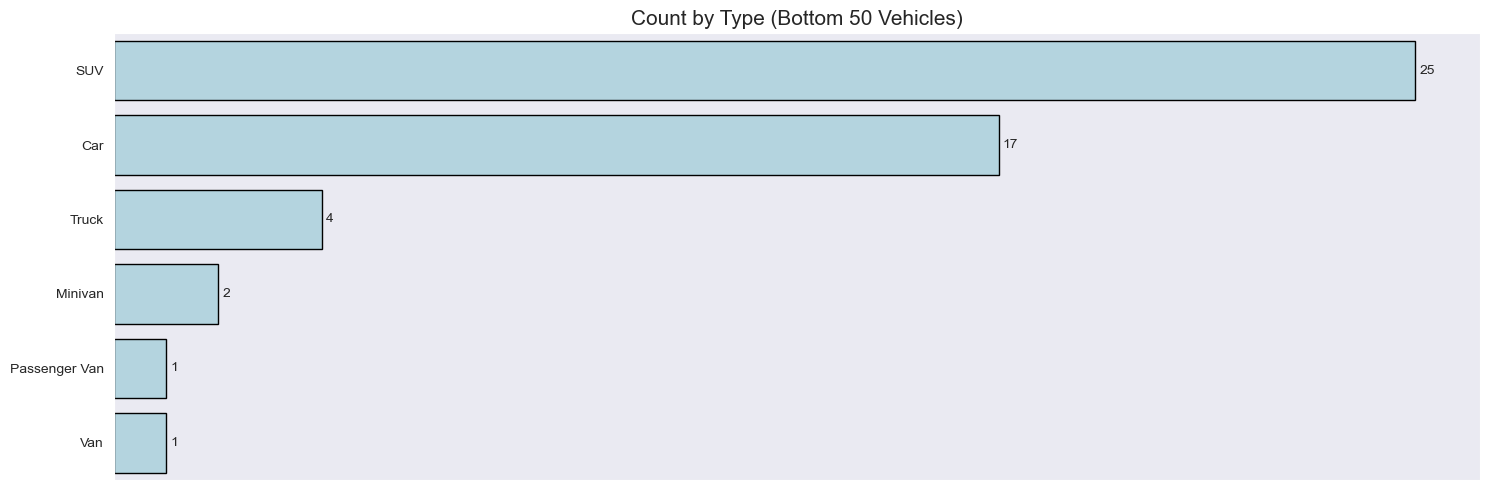

In [8]:
count_type = bottom_make_model_year.groupby(by = 'type_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False)

plt.figure(figsize=(15, 5))

plot = sns.barplot(data = count_type, y = 'type_jan2024', x = 'make_jan2024', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.0f}', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), 
                textcoords='offset points')
    
plt.title('Count by Type (Bottom 50 Vehicles)', fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks(ticks = range(0, 6), labels = ['SUV', 'Car', 'Truck', 'Minivan', 'Passenger Van', 'Van'])
plt.tight_layout()

plt.savefig('D:\Data Scraping\Turo\Charts\countbytypebottom50.png', dpi = 300)

### Price

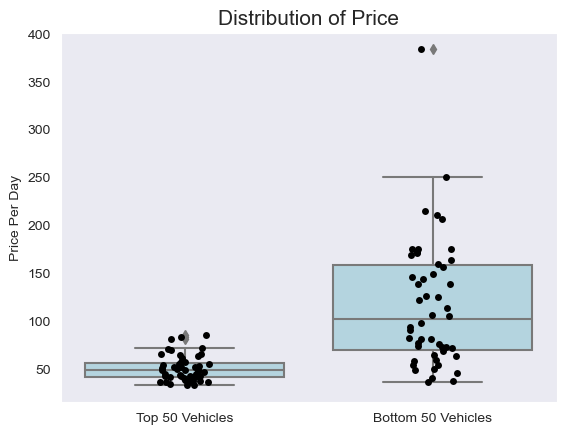

In [9]:
one = trips_by_make_model_year['average_q4_price'].tolist()
two = bottom_make_model_year['average_q4_price'].tolist()

top_bottom = pd.DataFrame({'top 50':one, 'bottom 50':two}).reset_index()

top_bottom_melt = pd.melt(top_bottom, id_vars = 'index', var_name = 'rank', value_name = 'price')

sns.boxplot(data = top_bottom_melt, y = 'price', x = 'rank', color = 'lightblue')

sns.stripplot(data = top_bottom_melt, y = 'price', x = 'rank', color="black", size=5, jitter=True)

plt.title('Distribution of Price', fontsize = 15)
plt.xticks(ticks = [0, 1], labels = ['Top 50 Vehicles', 'Bottom 50 Vehicles'])
plt.xlabel("")
plt.ylabel("Price Per Day")

plt.savefig('D:\Data Scraping\Turo\Charts\distribution of price.png', dpi = 300)

### Year

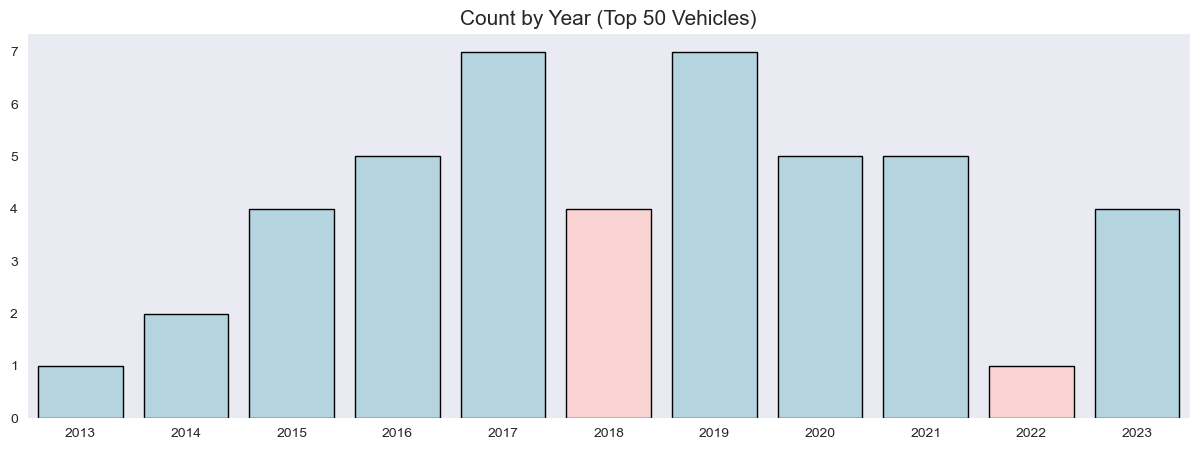

In [10]:
count_year = trips_by_make_model_year.groupby(by = 'year_jan2024').count().reset_index().sort_values(by = 'year_jan2024', ascending = True)

count_year = count_year[count_year['year_jan2024']>2012]

plt.figure(figsize=(15, 5))

colors = ['#FFCCCC' if year == 2018 or year == 2022 else 'lightblue' for year in count_year['year_jan2024']]

sns.barplot(data = count_year, y = 'type_jan2024', x = 'year_jan2024', palette = colors, edgecolor = 'black')

plt.title('Count by Year (Top 50 Vehicles)', fontsize = 15)
plt.ylabel("")
plt.xlabel("")

plt.savefig('D:\Data Scraping\Turo\Charts\countbyyeartop50.png', dpi = 300)

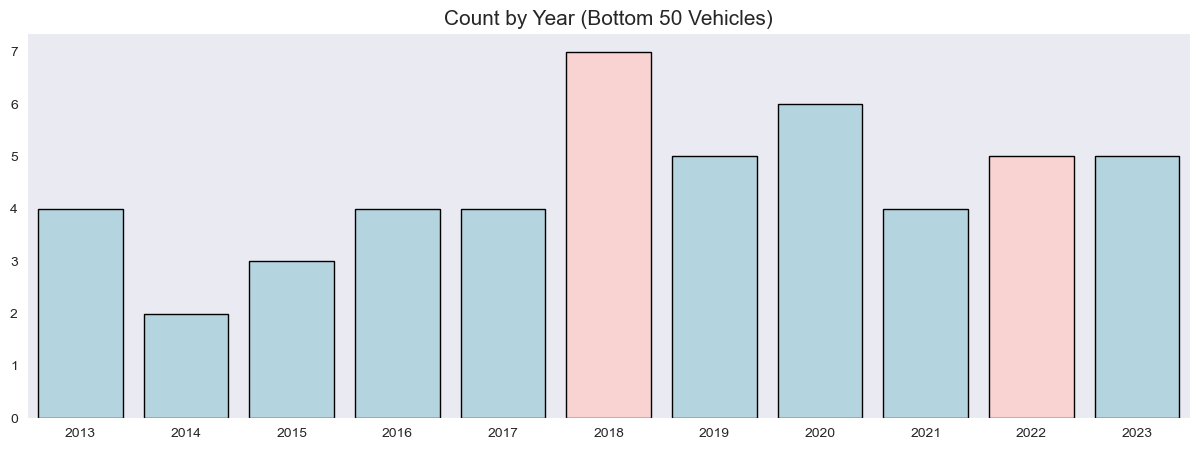

In [11]:
count_year = bottom_make_model_year.groupby(by = 'year_jan2024').count().reset_index().sort_values(by = 'year_jan2024', ascending = True)

count_year = count_year[count_year['year_jan2024']>2012]

plt.figure(figsize=(15, 5))

colors = ['#FFCCCC' if year == 2018 or year == 2022 else 'lightblue' for year in count_year['year_jan2024']]

plot = sns.barplot(data = count_year, y = 'type_jan2024', x = 'year_jan2024', edgecolor = 'black', palette = colors)


    
# for bar in plot.patches:
#     plot.annotate(f'{bar.get_height():.0f}', 
#                 (bar.get_x() + width / 2, bar.get_height()), # Adjust the position for vertical bars
#                 ha='center', va='bottom', xytext=(0, 5), 
#                 textcoords='offset points')

plt.title('Count by Year (Bottom 50 Vehicles)', fontsize = 15)
plt.ylabel("")
plt.xlabel("")

plt.savefig('D:\Data Scraping\Turo\Charts\countbyyearbottom50.png', dpi = 300)

### Make

In [47]:
df1 = trips_by_make_model_year.groupby(by = 'make_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]
df2 = df_nash.groupby(by = 'make_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]

df_merge = pd.merge(df1, df2, on = 'make_jan2024', how = 'inner')

df_merge['make_proportion'] = round(df_merge['type_jan2024'] / df_merge['id'], 2) * 100

df_merge = df_merge.sort_values(by = 'make_proportion', ascending = False)
df_merge

,make_jan2024,type_jan2024,id,make_proportion
17,Buick,2,2,100.0
6,Lexus,3,8,38.0
15,Dodge,3,8,38.0
14,FIAT,2,6,33.0
3,Nissan,13,44,30.0
5,Mazda,1,5,20.0
10,Jaguar,1,5,20.0
12,Honda,3,15,20.0
18,BMW,3,21,14.0
4,Mercedes-Benz,3,21,14.0


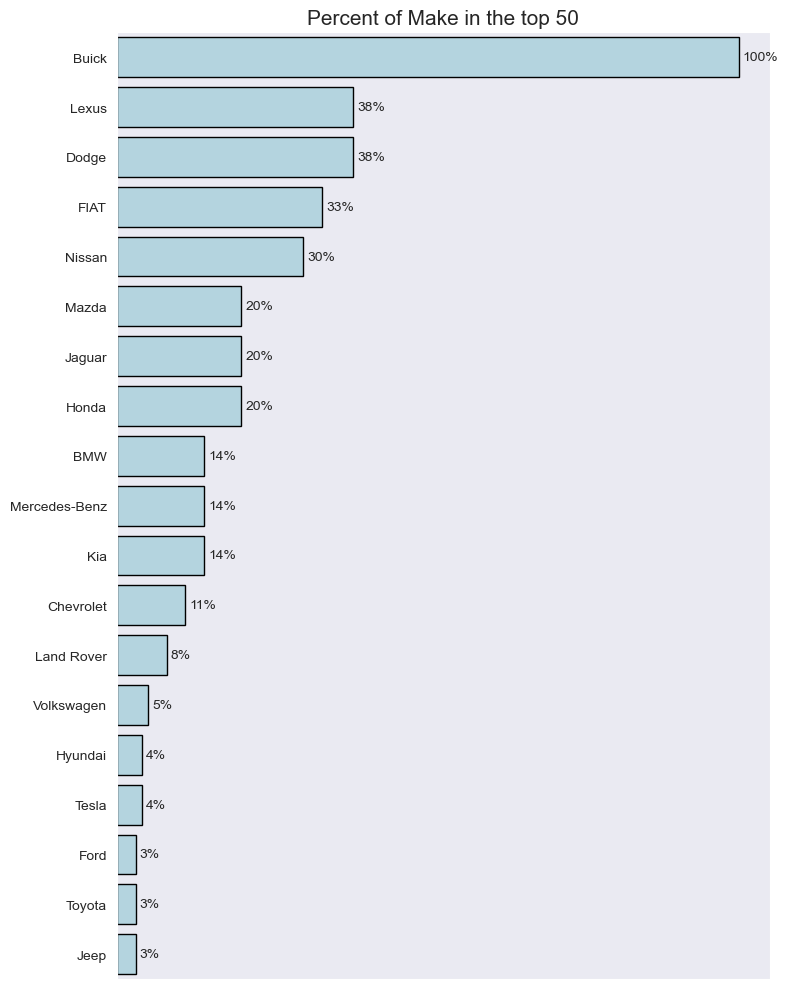

In [42]:
df1 = trips_by_make_model_year.groupby(by = 'make_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]
df2 = df_nash.groupby(by = 'make_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]

df_merge = pd.merge(df1, df2, on = 'make_jan2024', how = 'inner')

df_merge['make_proportion'] = round(df_merge['type_jan2024'] / df_merge['id'], 2) * 100

df_merge = df_merge.sort_values(by = 'make_proportion', ascending = False)

plt.figure(figsize=(8, 10))

plot = sns.barplot(data = df_merge, y = 'make_jan2024', x = 'make_proportion', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.0f}%', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), 
                textcoords='offset points')
    
plt.title('Percent of Make in the top 50', fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.tight_layout()

plt.savefig('D:\Data Scraping\Turo\Charts\percentmaketop50.png', dpi = 300)

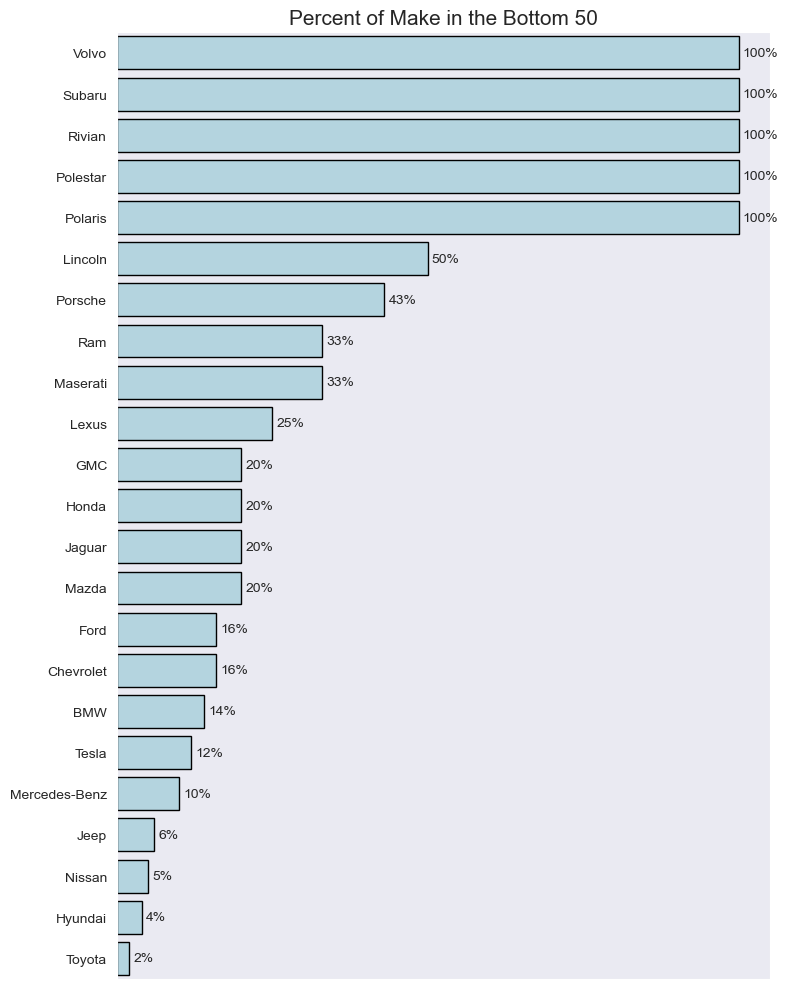

In [46]:
df1 = bottom_make_model_year.groupby(by = 'make_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]
df2 = df_nash.groupby(by = 'make_jan2024').count().reset_index().sort_values(by = 'make_jan2024', ascending = False).iloc[:, :2]

df_merge = pd.merge(df1, df2, on = 'make_jan2024', how = 'inner')

df_merge['make_proportion'] = round(df_merge['type_jan2024'] / df_merge['id'], 2) * 100

df_merge = df_merge.sort_values(by = 'make_proportion', ascending = False)

plt.figure(figsize=(8, 10))

plot = sns.barplot(data = df_merge, y = 'make_jan2024', x = 'make_proportion', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.0f}%', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), 
                textcoords='offset points')
    
plt.title('Percent of Make in the Bottom 50', fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.tight_layout()

plt.savefig('D:\Data Scraping\Turo\Charts\percentmakebottom50.png', dpi = 300)

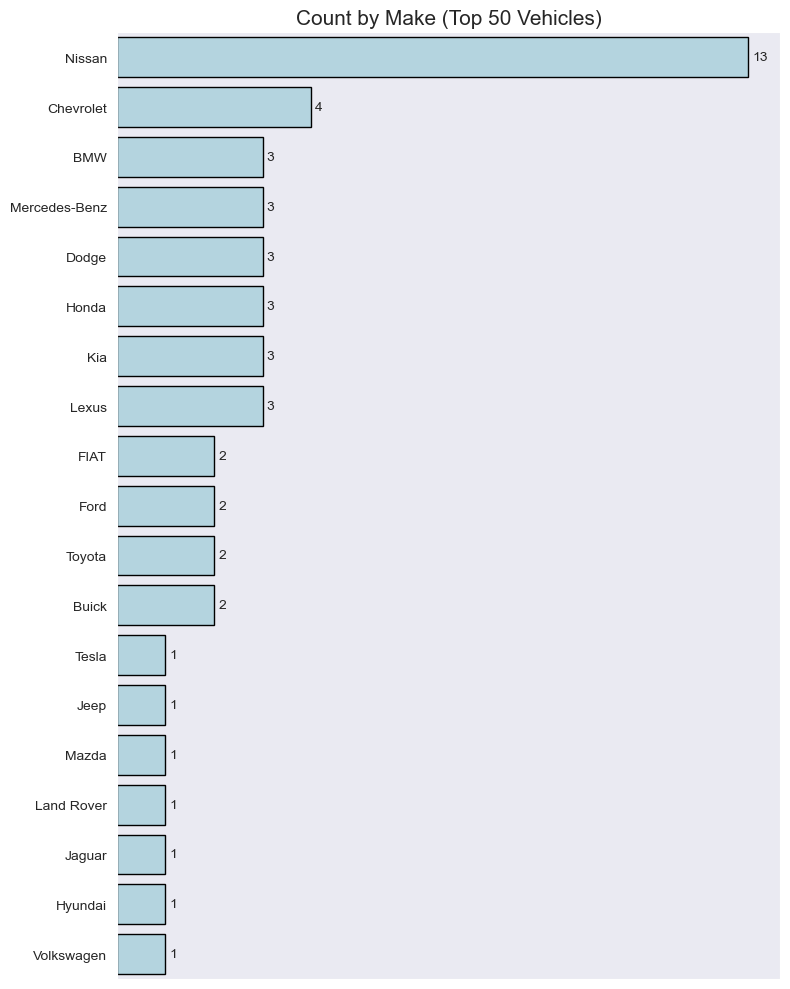

In [43]:
count_make = trips_by_make_model_year.groupby(by = 'make_jan2024').count().reset_index().sort_values(by = 'type_jan2024', ascending = False)

plt.figure(figsize=(8, 10))

plot = sns.barplot(data = count_make, y = 'make_jan2024', x = 'type_jan2024', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.0f}', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), 
                textcoords='offset points')
    
plt.title('Count by Make (Top 50 Vehicles)', fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.tight_layout()

plt.savefig('D:\Data Scraping\Turo\Charts\countbymaketop50.png', dpi = 300)

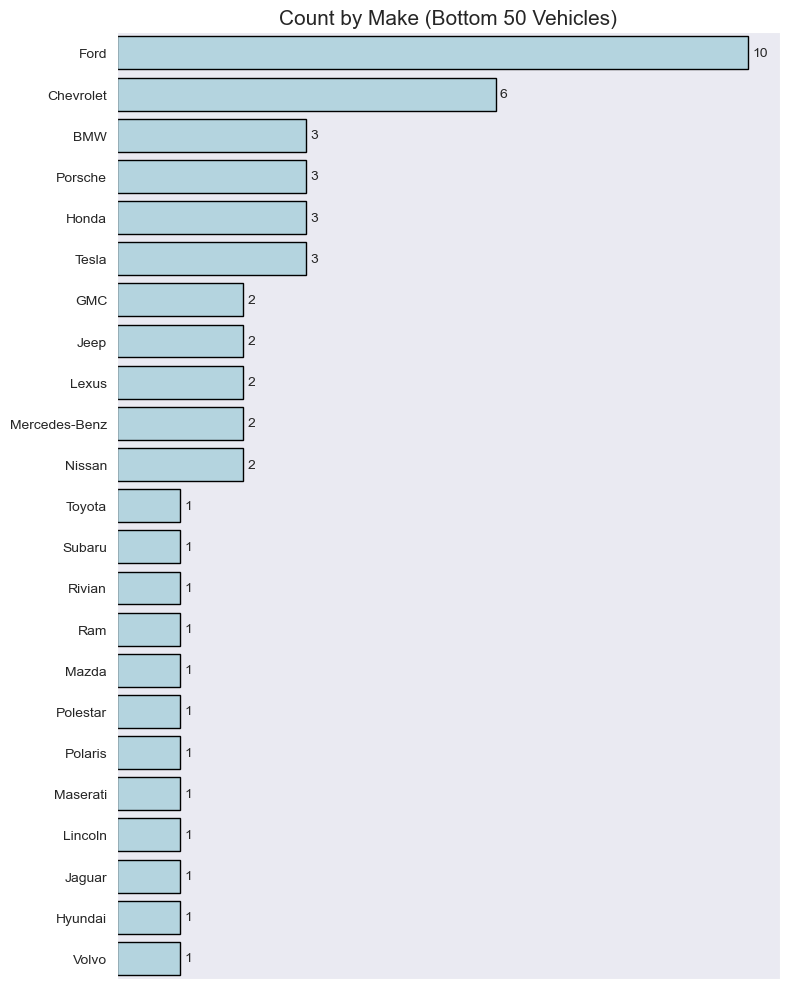

In [45]:
count_make_bottom = bottom_make_model_year.groupby(by = 'make_jan2024').count().reset_index().sort_values(by = 'type_jan2024', ascending = False)

plt.figure(figsize=(8, 10))

plot = sns.barplot(data = count_make_bottom, y = 'make_jan2024', x = 'type_jan2024', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.0f}', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), 
                textcoords='offset points')

plt.title('Count by Make (Bottom 50 Vehicles)', fontsize = 15)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.tight_layout()

plt.savefig('D:\Data Scraping\Turo\Charts\countbymakebottom50.png', dpi = 300)

---

# Taking a deeper look at Nissan 

In [16]:
nissan = df_nash[df_nash['make_jan2024'] == 'Nissan'][['trips_Q4_2023', 'average_q4_price', 'model_jan2024', 'type_jan2024', 'year_jan2024']].sort_values(by = 'trips_Q4_2023', ascending = False)

nissan.head()

,trips_Q4_2023,average_q4_price,model_jan2024,type_jan2024,year_jan2024
674,33,36.176429,Altima,CAR,2015
670,29,43.527273,Rogue,SUV,2018
668,28,42.000000,Maxima,CAR,2014
665,27,37.546333,Kicks,SUV,2023
664,27,35.712262,Altima,CAR,2019


In [17]:
nissan.count()

trips_Q4_2023       44
average_q4_price    44
model_jan2024       44
type_jan2024        44
year_jan2024        44
dtype: int64

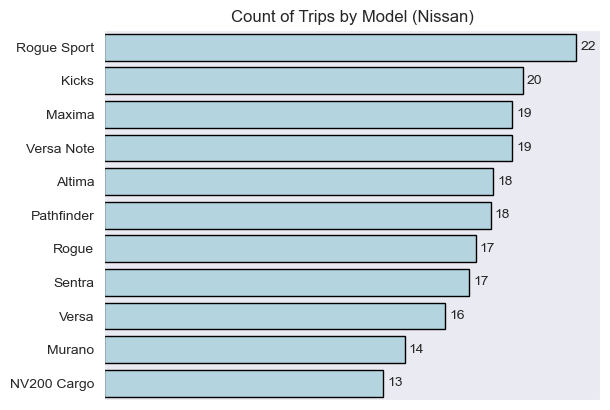

In [18]:
count_nissan = nissan[['model_jan2024', 'trips_Q4_2023', 'average_q4_price']].groupby(by = 'model_jan2024').mean().reset_index().sort_values(by = 'trips_Q4_2023', ascending = False)

count_nissan = count_nissan[count_nissan['trips_Q4_2023'] > 12]

plot = sns.barplot(data = count_nissan, x = 'trips_Q4_2023', y = 'model_jan2024', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.0f}', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(3, 0), 
                textcoords='offset points')

plt.title('Count of Trips by Model (Nissan)')
plt.ylabel('')
plt.xlabel('')
plt.xticks([]);

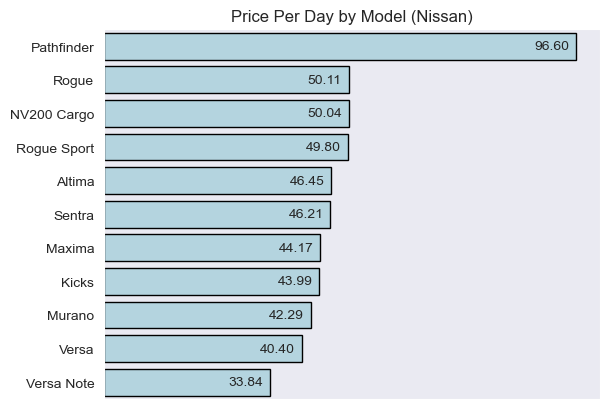

In [19]:
price_nissan = count_nissan.sort_values(by = 'average_q4_price', ascending = False)

plot = sns.barplot(data = price_nissan, x = 'average_q4_price', y = 'model_jan2024', edgecolor = 'black', color = 'lightblue')

for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}', 
                (p.get_x() + p.get_width(), 
                 p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(-30, 0), 
                textcoords='offset points')
    
plt.title('Price Per Day by Model (Nissan)')
plt.ylabel('')
plt.xlabel('')
plt.xticks([]);

In [20]:
count_nissan

,model_jan2024,trips_Q4_2023,average_q4_price
8,Rogue Sport,22.000,49.803333
2,Kicks,19.500,43.987802
3,Maxima,19.000,44.174375
11,Versa Note,19.000,33.841354
0,Altima,18.125,46.454178
6,Pathfinder,18.000,96.596250
7,Rogue,17.300,50.110543
9,Sentra,17.000,46.208786
10,Versa,15.875,40.399561
4,Murano,14.000,42.289091


In [21]:
vehicle_cost = {'Pathfinder':33680, 
                'Rogue Sport':24960, 
                'Kicks':19700, 
                'Maxima':37240,
                'Altima':24550,
                'Rogue':26700, 
                'Versa Note':15080,
                'Sentra':15080,
                'Versa':15080, 
                'NV200 Cargo':24000, 
                'Murano':28502}

count_nissan['vehicle_cost'] = count_nissan['model_jan2024'].map(vehicle_cost)

count_nissan['trips_zscore'] = zscore(count_nissan['trips_Q4_2023'])
count_nissan['price_zscore'] = zscore(count_nissan['average_q4_price'])
count_nissan['vehicle_cost_zscore'] = zscore(count_nissan['vehicle_cost'])

count_nissan['rank'] = count_nissan['trips_zscore'] + count_nissan['price_zscore'] - count_nissan['vehicle_cost_zscore']


finals = count_nissan.sort_values(by = 'rank', ascending = False)

column_names = ['Model', 'Avg Trips', 'Avg Price', 'Vehicle Cost', 'Trips z-score', 'Price z-score', 'Vehicle Cost z-score', 'Rank']

finals.columns = column_names

finals

,Model,Avg Trips,Avg Price,Vehicle Cost,Trips z-score,Price z-score,Vehicle Cost z-score,Rank
6,Pathfinder,18.000,96.596250,33680,0.194749,3.022100,1.355529,1.861320
8,Rogue Sport,22.000,49.803333,24960,1.842627,0.022935,0.127838,1.737724
2,Kicks,19.500,43.987802,19700,0.812703,-0.349809,-0.612719,1.075614
11,Versa Note,19.000,33.841354,15080,0.606719,-1.000139,-1.263171,0.869750
9,Sentra,17.000,46.208786,15080,-0.217220,-0.207456,-1.263171,0.838494
10,Versa,15.875,40.399561,15080,-0.680686,-0.579795,-1.263171,0.002690
0,Altima,18.125,46.454178,24550,0.246245,-0.191728,0.070114,-0.015596
7,Rogue,17.300,50.110543,26700,-0.093629,0.042625,0.372813,-0.423817
3,Maxima,19.000,44.174375,37240,0.606719,-0.337850,1.856742,-1.587874
5,NV200 Cargo,13.000,50.035333,24000,-1.865098,0.037804,-0.007321,-1.819973


note - prices are kelly blue book values for 2022 models with the exception of NV200 which is 2021 model (was discontinued after 2021)

In [22]:
finals[finals['Rank'] > 0]

,Model,Avg Trips,Avg Price,Vehicle Cost,Trips z-score,Price z-score,Vehicle Cost z-score,Rank
6,Pathfinder,18.000,96.596250,33680,0.194749,3.022100,1.355529,1.861320
8,Rogue Sport,22.000,49.803333,24960,1.842627,0.022935,0.127838,1.737724
2,Kicks,19.500,43.987802,19700,0.812703,-0.349809,-0.612719,1.075614
11,Versa Note,19.000,33.841354,15080,0.606719,-1.000139,-1.263171,0.869750
9,Sentra,17.000,46.208786,15080,-0.217220,-0.207456,-1.263171,0.838494
10,Versa,15.875,40.399561,15080,-0.680686,-0.579795,-1.263171,0.002690
